In [1]:
#Importing Required libraries 
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
#Loading Data 
df = pd.read_csv(r"C:\Users\Admin\Downloads\creditcard.csv\creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Preprocessing data 
X = df.drop(['Time', 'Class'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [4]:
#Applying Isolation Forest,One Class SVM and Z score 
iso = IsolationForest(contamination=0.03, random_state=42)
df_scaled['iso'] = iso.fit_predict(X_scaled)
svm = OneClassSVM(kernel='rbf', nu=0.03, gamma='auto')
df_scaled['svm'] = svm.fit_predict(X_scaled)
z_scores = np.abs(zscore(X_scaled))
df_scaled['zscore'] = (z_scores > 3).any(axis=1).astype(int)


In [5]:
#Creating ensemble
# Converting all to 0 (normal), 1 (anomaly)
df_scaled['iso'] = (df_scaled['iso'] == -1).astype(int)
df_scaled['svm'] = (df_scaled['svm'] == -1).astype(int)

df_scaled['Final_Anomaly'] = (df_scaled[['iso', 'svm', 'zscore']].sum(axis=1) >= 2).astype(int)


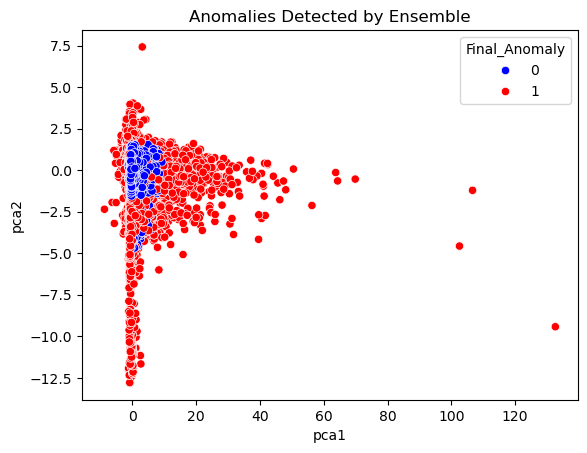

In [15]:
#Visualising Anomalies
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df_scaled['pca1'] = pca_result[:,0]
df_scaled['pca2'] = pca_result[:,1]

sns.scatterplot(data=df_scaled, x='pca1', y='pca2', hue='Final_Anomaly', palette={0:'blue',1:'red'})
plt.title("Anomalies Detected by Ensemble")
plt.show()


In [16]:
#Evaluating 
from sklearn.metrics import classification_report

print(classification_report(df['Class'], df_scaled['Final_Anomaly']))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98    284315
           1       0.04      0.85      0.08       492

    accuracy                           0.96    284807
   macro avg       0.52      0.91      0.53    284807
weighted avg       1.00      0.96      0.98    284807

